## Practical 6 - Deutsch Jozsa Alogrithm

In [1]:
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit[visualization]

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [3]:
def dj_oracle( n, balanced = True ):
    oracle = QuantumCircuit ( n + 1 )
    if balanced:
        for qubit in range( n ):
            oracle.cx( qubit, n )
    else:
        pass
    return oracle

In [4]:
def deutsch_joza( n, oracle ):
    circuit = QuantumCircuit( n+1, n )
    circuit.x( n )
    circuit.h( n )
    circuit.h( range( n ) )
    circuit.compose( oracle, inplace = True )
    circuit.h( range( n ) )
    circuit.measure( range( n ), range( n ) )
    return circuit

Measurement results: {'111': 1024}
Function is balanced.


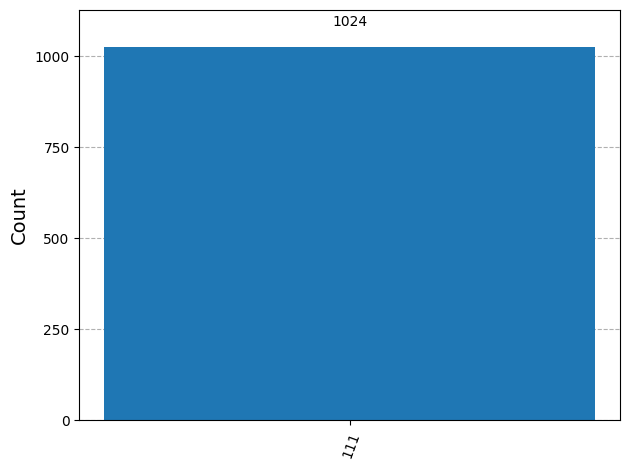

In [5]:
n = 3
oracle = dj_oracle( n, balanced = True )
dj_circuit = deutsch_joza( n, oracle )

# Use AerSimulator from qiskit_aer
simulator = AerSimulator()

job = simulator.run( dj_circuit, shots = 1024 )
result = job.result()
counts = result.get_counts()

print( "Measurement results:", counts )

if '0'*n in counts:
    print( "Function is constant." )
else:
    print( "Function is balanced." )

dj_circuit.draw( "mpl")
result = job.result()

dj_circuit.draw( "mpl")
plot_histogram( counts )